In [1]:
import pandas as pd
import numpy as np
X_train_df = pd.read_csv('./data/nba/X_train.csv')
y_train_df = pd.read_csv('./data/nba/y_train.csv')

X_test_df = pd.read_csv('./data/nba/X_test.csv')
print(X_train_df.shape)
print(X_train_df.columns)
print(y_train_df.columns)
print(X_train_df[:4])
print(y_train_df[:4])

(52399, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')
   PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0       2         557        15.5         0         0.7        2.1         2   
1       2         151        20.1         0         0.8        2.7         2   
2       3         448        14.2         0         0.8        5.1         2   
3       1         279        10.6         0         0.6        1.9         2   

   CLOSE_DEF_DIST  
0             0.0  
1             3.4  
2             0.1  
3             2.7  
   FGM
0    1
1    1
2    0
3    1


In [2]:
def pd2np(df):
    return df.values

In [10]:
X_train = pd2np(X_train_df)
y_train_ = pd2np(y_train_df)

X_test = pd2np(X_test_df)

In [4]:
print(type(X_train))
print(X_train.shape)


<class 'numpy.ndarray'>
(52399, 8)


In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X_train)

In [6]:
X_std[:4]

array([[-0.41212853,  0.99061862,  0.59309458, -0.57819043, -0.66369214,
        -1.28746269, -0.59913748, -1.50184536],
       [-0.41212853, -0.96794898,  1.3383832 , -0.57819043, -0.6314213 ,
        -1.21987504, -0.59913748, -0.26180313],
       [ 0.46765322,  0.46479629,  0.38246954, -0.57819043, -0.6314213 ,
        -0.94952444, -0.59913748, -1.46537353],
       [-1.29191029, -0.35046954, -0.20079981, -0.57819043, -0.69596299,
        -1.30999191, -0.59913748, -0.51710595]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y_train_, test_size=0.1, random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression

C = [.001, .1, 1, 10]

for c in C:
    log = LogisticRegression(penalty='l1', C=c)
    log.fit(X_train, y_train.ravel())
    print('C:', c)
    print('Coefficient of each feature:', log.coef_)
    print('Training accuracy:', log.score(X_train, y_train.ravel()))
    print('Test accuracy:', log.score(X_valid, y_valid.ravel()))
    print('')

C: 0.001
Coefficient of each feature: [[ 0.          0.          0.05875084  0.         -0.02496459 -0.33936683
   0.          0.08441235]]
Training accuracy: 0.5944146398354503
Test accuracy: 0.6022900763358778

C: 0.1
Coefficient of each feature: [[ 0.0043434   0.00295913  0.10186569  0.02754019 -0.1219533  -0.56198628
   0.03192     0.27509883]]
Training accuracy: 0.6061409275005831
Test accuracy: 0.6154580152671756

C: 1
Coefficient of each feature: [[ 0.0050445   0.00411555  0.10157376  0.03959949 -0.13391239 -0.56618519
   0.0349594   0.27696069]]
Training accuracy: 0.606183337220891
Test accuracy: 0.6150763358778626

C: 10
Coefficient of each feature: [[ 0.00511533  0.00423079  0.10154622  0.04079946 -0.13506433 -0.56660679
   0.0352706   0.27714714]]
Training accuracy: 0.606183337220891
Test accuracy: 0.6150763358778626



In [9]:
from sklearn.preprocessing import PolynomialFeatures

for d in range(1, 4):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.fit_transform(X_valid)

    log = LogisticRegression(penalty='l1', C= 0.1)
    log.fit(X_train_poly, y_train.ravel())
    
    y_train_pred = log.predict(X_train_poly)
    y_valid_pred = log.predict(X_valid_poly)
    
    print('\n[Degree = %d]' % d)
    print('Training accuracy:', log.score(X_train_poly, y_train.ravel()))
    print('Test accuracy:', log.score(X_valid_poly, y_valid.ravel()))


[Degree = 1]
Training accuracy: 0.606183337220891
Test accuracy: 0.6154580152671756

[Degree = 2]
Training accuracy: 0.6149409444644712
Test accuracy: 0.6213740458015267

[Degree = 3]
Training accuracy: 0.6197968574397252
Test accuracy: 0.6223282442748092


In [24]:
def accuracy(X, y):
    log = LogisticRegression(penalty='l1', C= 0.1)
    log.fit(X_poly, y_train_.ravel())
    return log.score(X,y)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train.ravel())

y_pred = forest.predict(X_valid)
print('Accuracy (forest): %f' % accuracy_score(y_valid, y_pred))

Accuracy (forest): 0.600763


 1) GAME_CLOCK                     0.201862
 2) SHOT_DIST                      0.198820
 3) SHOT_CLOCK                     0.179495
 4) CLOSE_DEF_DIST                 0.171474
 5) TOUCH_TIME                     0.140442
 6) PERIOD                         0.051902
 7) DRIBBLES                       0.048792
 8) PTS_TYPE                       0.007212


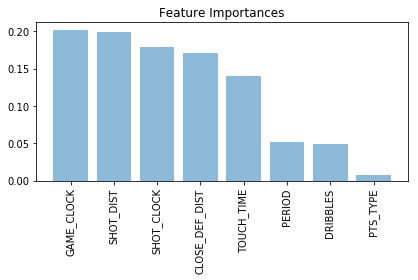

In [25]:
# inline plotting instead of popping out
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X_train_df.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X_train_df.columns.values[indices], rotation=90)
plt.tight_layout()
plt.savefig('../output/fig-forest-feature-importances2.png', dpi=300)
plt.show()

In [15]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)
log = LogisticRegression(penalty='l1', C= 0.1)
log.fit(X_poly, y_train_.ravel())

X_test_std = sc_x.fit_transform(X_test)
X_test_poly = poly.fit_transform(X_test_std)

y_test_pred = log.predict(X_test_poly)

print('\n[Degree = %d]' % d)
print(y_test_pred)


[Degree = 3]
[0 0 0 ... 0 0 0]
